In [2]:
import numpy as np
import matplotlib.pyplot as plt
import homework2 as shuf

list_rand = shuf.myran(1000000)

a = 2.35

# 주어진 0~1 사이의 난수들 (uniform)을 1~100 사이의 imf를 만족하는 난수로 변환
# 별이 질량에 따라 분포할 확률을 이용
# 1) IMF의 확률 밀도 함수를 구한다.
# 2) 누적 확률 분포 함수를 구한다.
# 3) 위 함수의 역을 구한다.
# 4) 구한 함수를 이용하여 기존 난수를 별이 존재할 확률에 따라 변환하여 새로운 난수를 구해낸다.

def Sal_IMF(x):
    global a
    
    return x**(-a)

def RN_for_IMF(x):
    global a
    m_high = 100
    m_low = 1
    t = 1 - a
    
    return ((m_high**t - m_low**t) * x + m_low**t)**(1 / t)

for _ in range(len(list_rand)):
    list_rand[_] = RN_for_IMF(list_rand[_])

m = np.linspace(1, 100, 1000)
val_imf = Sal_IMF(m)

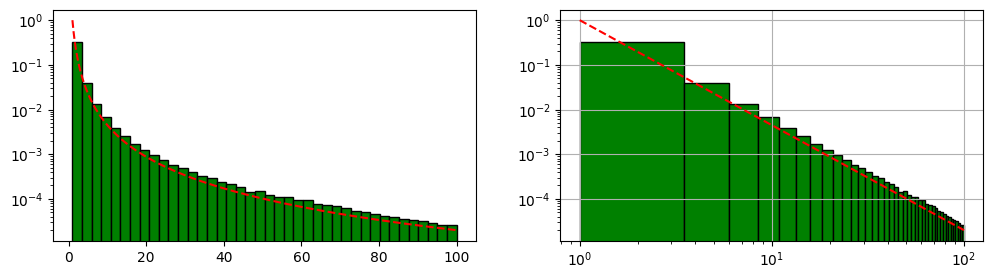

In [12]:
fig = plt.figure(figsize=(12, 3))
#yscale 만 log
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(list_rand, bins=40,edgecolor="black", 
         color="green", density=True, label="Generated Masses")
ax1.plot(m, val_imf, '--', 
         color="red", label="Salpeter IMF (a=2.35)")
ax1.set_yscale('log')

#xscale, yscale 모두 log
ax2 = fig.add_subplot(1, 2, 2)
cmp1 = ax2.hist(list_rand, bins=40,edgecolor="black", 
                color="green", density=True, label="Generated Masses")
red = ax2.plot(m, val_imf, '--', 
         color="red", label="Salpeter IMF (a=2.35)")
ax2.set_yscale('log'); ax2.set_xscale('log')

plt.grid(True)
plt.show()

In [4]:
list_rand2 = np.random.uniform(0, 1, 1000000)
for _ in range(len(list_rand2)):
    list_rand2[_] = RN_for_IMF(list_rand2[_])

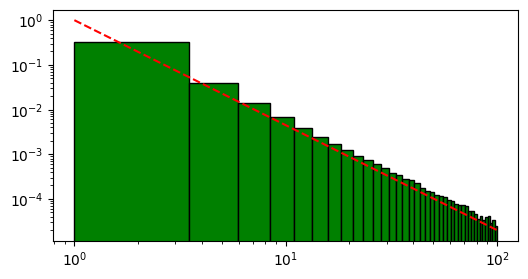

In [11]:
plt.figure(figsize=(6, 3))
plt.xscale('log')
plt.yscale('log')
#히스토그램
cmp2 = plt.hist(list_rand2, bins=40,edgecolor="black", 
                color="green", density=True)
#비교 그래프
plt.plot(m, val_imf, '--', 
         color="red", label="Salpeter IMF (a=2.35)")
plt.show()

In [8]:
from numpy.linalg import norm

similarity = np.dot(cmp1[0], cmp2[0]) / (norm(cmp1[0]) * norm(cmp2[0]))
print(similarity)

0.9999997006789864


In [ ]:
from scipy.interpolate import interp1d

hist_x = (cmp1[1][:-1] + cmp1[1][1:]) / 2 #gpt 이용하여 유사도 검사를 위한 히스토그램의 데이터 타입 확인
hist_y = cmp1[0]

red_x = m
red_y = val_imf 

interp_hist_y = interp1d(hist_x, hist_y, kind='linear', fill_value="extrapolate")
aligned_hist_y = interp_hist_y(red_x)

similarity = np.mean((red_y - aligned_hist_y)**2)
print(f"Mean Squared Error (MSE): {similarity}")

Mean Squared Error (MSE): 0.0010174138704430718
